In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'shuffled_meta_dataset.csv'  # Replace with your file path if needed
data = pd.read_csv(file_path)

# Define features and target
features = ["P_Autism_face", "P_Autism_mri", "P_ASQ"]  # Feature columns
target = "Marker"  # Target column

# Split into features (X) and target (y)
X = data[features]
y = data[target]

# Split the dataset into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalize the feature columns using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check dataset shapes
print("Training Set Shape:", X_train_scaled.shape)
print("Validation Set Shape:", X_val_scaled.shape)
print("Test Set Shape:", X_test_scaled.shape)


Training Set Shape: (160000, 3)
Validation Set Shape: (20000, 3)
Test Set Shape: (20000, 3)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Train the Random Forest model on the training set
rf_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = rf_model.predict(X_val_scaled)
y_val_proba = rf_model.predict_proba(X_val_scaled)[:, 1]

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_proba)

# Print validation metrics
print("Validation Metrics (Random Forest):")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}")
print(f"ROC-AUC: {val_roc_auc:.4f}")

# Predict on the test set
y_test_pred = rf_model.predict(X_test_scaled)
y_test_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Print test metrics
print("\nTest Metrics (Random Forest):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")


Validation Metrics (Random Forest):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Test Metrics (Random Forest):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000


Feature Importance (Random Forest):
         Feature  Importance
0  P_Autism_face        0.36
1   P_Autism_mri        0.36
2          P_ASQ        0.28


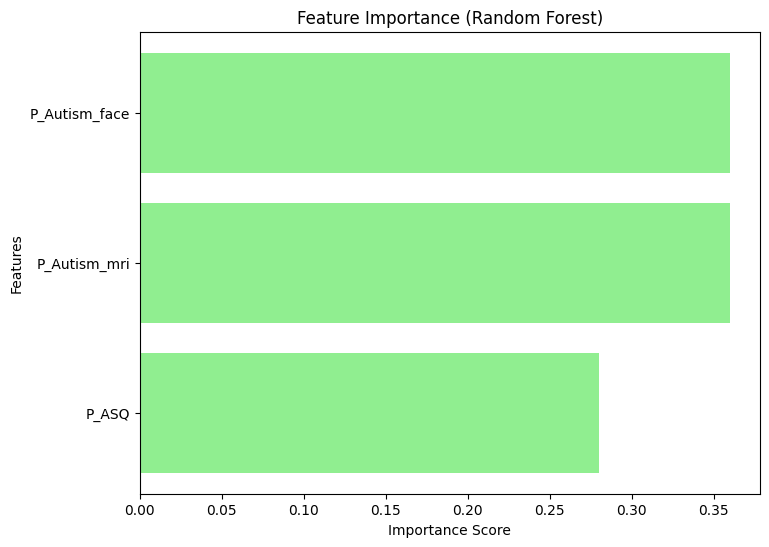

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the Random Forest model
rf_feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
rf_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance table
print("Feature Importance (Random Forest):")
print(rf_importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


In [ ]:
import pickle

# Save the trained Random Forest model
model_filename = 'MetaModel.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)
print(f"Model saved as {model_filename}")

# To load the model later
# with open(model_filename, 'rb') as file:
#     loaded_model = pickle.load(file)


Model saved as MetaModel.pkl


In [ ]:
import joblib

# Load the model from a .pkl file
model = joblib.load("MetaModel.pkl")



In [ ]:
import pandas as pd

# Define manual inputs as a DataFrame with proper column names
manual_inputs = pd.DataFrame([
    [14.90,24.82,0.28],  # Example 1: Face, MRI, ASQ predictions
    [90.25, 80.15, 100.00],  # Example 2: Another set of predictions
], columns=['P_Autism_face', 'P_Autism_mri', 'P_ASQ'])  # Use the same feature names as in your dataset

# Apply the same scaler used during training
manual_inputs_scaled = scaler.transform(manual_inputs)

# Predict using the loaded model
predictions = model.predict(manual_inputs_scaled)
probabilities = model.predict_proba(manual_inputs_scaled)

# Display predictions and probabilities
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    print(f"Input {i+1}:")
    print(f"  Predicted Class: {pred}")
    print(f"  Class Probabilities: {prob}")


Input 1:
  Predicted Class: 0
  Class Probabilities: [1. 0.]
Input 2:
  Predicted Class: 1
  Class Probabilities: [0. 1.]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=100)
logistic_model.fit(X_train_scaled, y_train)

# Predict on the test set
logistic_predictions = logistic_model.predict(X_test_scaled)
logistic_probabilities = logistic_model.predict_proba(X_test_scaled)

# Evaluate the model
print("Logistic Regression Metrics:")
print(classification_report(y_test, logistic_predictions))
print("Accuracy:", accuracy_score(y_test, logistic_predictions))


Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Accuracy: 1.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Ensure the model is trained
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Define manual inputs as a DataFrame with proper column names
manual_inputs = pd.DataFrame([
    [35.82, 6.80, 9.41],  # Example 1: Face, MRI, ASQ predictions
    [90.25, 80.15, 100.00],  # Example 2: Another set of predictions
], columns=['P_Autism_face', 'P_Autism_mri', 'P_ASQ'])  # Use your feature names

# Apply the same scaler used during training
manual_inputs_scaled = scaler.transform(manual_inputs)

# Predict using the trained Logistic Regression model
predictions = logistic_model.predict(manual_inputs_scaled)
probabilities = logistic_model.predict_proba(manual_inputs_scaled)

# Display predictions and probabilities
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    print(f"Input {i+1}:")
    print(f"  Predicted Class: {pred}")
    print(f"  Class Probabilities: {prob}")


Input 1:
  Predicted Class: 0
  Class Probabilities: [9.99336622e-01 6.63378112e-04]
Input 2:
  Predicted Class: 1
  Class Probabilities: [7.68547876e-05 9.99923145e-01]
